In [1]:
import os
import nltk
nltk.download('stopwords')
import pandas as pd
from ExtractContent import GetTrainingClassification, ExtractBodyFromDir, BuildDataSet, Sanitize_Data, remove_extra_fields
from print_tt import print_output
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
    data_dir_path = "DataSet" + os.path.sep 
    tr_email_path = data_dir_path + "spam-mail.tr.label"
    tr_extract_dir_path = data_dir_path + "TR"
    tt_extract_dir_path = data_dir_path + "TT"
    tr_content_dir_path = data_dir_path + "TRemailSet"
    tt_content_dir_path = data_dir_path + "TTemailSet"
    tr_csv_path = data_dir_path + "TrainningSet.csv"
    tt_csv_path = "DataSet" + os.path.sep + "TestingSet.csv"
    is_testing_all_models = True

    #Loads the targets
    emailTargets = GetTrainingClassification(tr_email_path)

In [3]:
    print("\Loading testing and training emails:")
    # generate training dataset
    ExtractBodyFromDir(tr_extract_dir_path, tr_content_dir_path)
    BuildDataSet(tr_content_dir_path, tr_content_dir_path,tr_csv_path, emailTargets)

    # generate testing dataset
    ExtractBodyFromDir(tt_extract_dir_path, tt_content_dir_path)
    BuildDataSet(tt_content_dir_path, tt_content_dir_path,tt_csv_path, emailTargets)

\Loading testing and training emails:
 Loading emails into a DataSet [ ---------------------------------------------------]
 Loading emails into a DataSet [ ---------------------------------------------------]


In [4]:
    TrainDataSet = pd.read_csv(tr_csv_path, sep=';',names=('position', 'Subject', 'Content', 'SPAM')).sort_values('position')
    TestDataSet = pd.read_csv(tt_csv_path, sep=';',names=('position', 'Subject', 'Content')).sort_values('position')

In [5]:
TrainDataSet

,position,Subject,Content,SPAM
280,1,One of a kind Money maker! Try it for free!,"! Content-Type: text/html\tcharset=""iso-8859-1...",0
122,2,link to my webcam you wanted,Wanna see sexually curious teens playing wit...,0
36,3,Re: How to manage multiple Internet connections?,? Content-Type: text/plain charset=us-asciiCon...,1
443,4,[SPAM] Give her 3 hour rodeo,"o Enhance your desire, pleasure and performanc...",0
363,5,Best Price on the netf5f8m1,1 (suddenlysusan@Stoolmail.zzn.com) on Tuesda...,0
...,...,...,...,...
1765,2496,"[SOLVED] Re: NVidia MCP61, no sound...",". Dear Anand,=20I tried your configuration fil...",1
1882,2497,Re: PDF grief - was Re: Flash is open?,? Content-Type: text/plain charset=iso-8859-1C...,1
941,2498,RE: [ILUG] What HOWTOs for SOHO system,"m Hi Dermot, if have a look at one of the dist...",1
821,2499,[Spambayes] hammie.py vs. GBayes.py,y Guido> Therefore I propose to nuke GBaye...,1


In [6]:
TestDataSet

,position,Subject,Content
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M..."
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...
411,3,Re: (no subject),) I've picked up these patches and will submit...
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0..."
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...
...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t..."
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0..."
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...


In [7]:
    # Vérifie et supprime les doublons ----------------------- ON GARDE ?
    #TrainDataSet.drop_duplicates(inplace=True)

In [8]:
print("\nTraitement DataSet:")
Sanitize_Data(TestDataSet) #sanitize and collect the word number and the char number
Sanitize_Data(TrainDataSet)


Traitement DataSet:
  Traitement DataSet [ -]
  Traitement DataSet [ -]


In [10]:
TestDataSet

,position,Subject,Content,Text_clain,wordNum,messageLength
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M...",n 1 16 0400 10 3 02 gari lawrenc murphi wrote ...,155,541
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...,c tri rebuild packag system stock orno rpmmacr...,143,537
411,3,Re: (no subject),) I've picked up these patches and will submit...,pick patch submit cvs eventu bug worth fix ple...,324,1114
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",f doctyp html public w3c dtd xhtml 1 0 transit...,1171,5077
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...,e content type multipart altern boundari nextp...,363,2388
...,...,...,...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t...",way tellurid way back world8 29 02dear friend ...,2003,5672
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...,e html head titl c news bulletin titl meta con...,398,1926
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",l doctyp html public w3c dtd xhtml 1 0 transit...,2947,12469
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...,r content type text plain charset iso 8859 1co...,110,969


In [11]:
    # separe le 'target' et les 'features' du DataSet de Trainning
    y = pd.DataFrame(TrainDataSet.SPAM) 
    x = TrainDataSet.drop(['SPAM'], axis=1)

In [12]:
    print("Moyenne Nomre de mots du DataSet d'entrainement :", int(TrainDataSet['wordNum'].mean()))
    print("Moyenne Nomre de mots du DataSet d'entrainement :", int(TestDataSet['wordNum'].mean()))
    max_feature = max(int(TrainDataSet['wordNum'].mean()), int(TestDataSet['wordNum'].mean()))

Moyenne Nomre de mots du DataSet d'entrainement : 417
Moyenne Nomre de mots du DataSet d'entrainement : 446


In [13]:
    traintarget = y
    trainset = x
    testset = TestDataSet

In [14]:
testset

,position,Subject,Content,Text_clain,wordNum,messageLength
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M...",n 1 16 0400 10 3 02 gari lawrenc murphi wrote ...,155,541
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...,c tri rebuild packag system stock orno rpmmacr...,143,537
411,3,Re: (no subject),) I've picked up these patches and will submit...,pick patch submit cvs eventu bug worth fix ple...,324,1114
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",f doctyp html public w3c dtd xhtml 1 0 transit...,1171,5077
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...,e content type multipart altern boundari nextp...,363,2388
...,...,...,...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t...",way tellurid way back world8 29 02dear friend ...,2003,5672
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...,e html head titl c news bulletin titl meta con...,398,1926
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",l doctyp html public w3c dtd xhtml 1 0 transit...,2947,12469
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...,r content type text plain charset iso 8859 1co...,110,969


In [15]:
trainset

,position,Subject,Content,Text_clain,wordNum,messageLength
280,1,One of a kind Money maker! Try it for free!,"! Content-Type: text/html\tcharset=""iso-8859-1...",content type text html charset iso 8859 1 cont...,691,2522
122,2,link to my webcam you wanted,Wanna see sexually curious teens playing wit...,wanna see sexual curious teen play http www si...,51,188
36,3,Re: How to manage multiple Internet connections?,? Content-Type: text/plain charset=us-asciiCon...,content type text plain charset us asciicont d...,435,1450
443,4,[SPAM] Give her 3 hour rodeo,"o Enhance your desire, pleasure and performanc...",enhanc desir pleasur perform 100 guarante see ...,21,86
363,5,Best Price on the netf5f8m1,1 (suddenlysusan@Stoolmail.zzn.com) on Tuesda...,1 suddenlysusan stoolmail zzn com tuesday juli...,83,295
...,...,...,...,...,...,...
1765,2496,"[SOLVED] Re: NVidia MCP61, no sound...",". Dear Anand,=20I tried your configuration fil...",dear anand 20i tri configur file noth chang ki...,1758,8749
1882,2497,Re: PDF grief - was Re: Flash is open?,? Content-Type: text/plain charset=iso-8859-1C...,content type text plain charset iso 8859 1cont...,278,1223
941,2498,RE: [ILUG] What HOWTOs for SOHO system,"m Hi Dermot, if have a look at one of the dist...",hi dermot look one dist like www smoothwal org...,269,999
821,2499,[Spambayes] hammie.py vs. GBayes.py,y Guido> Therefore I propose to nuke GBaye...,guido therefor propos nuke gbay py ad u featur...,49,151


In [16]:
traintarget

,SPAM
280,0
122,0
36,1
443,0
363,0
...,...
1765,1
1882,1
941,1
821,1


In [17]:
    # Vectorisation de comptage
    # Il s'agit de compter le nombre d'occurrences de chaque mot dans le texte donné.
    # --Training data
    vectorize_Train = CountVectorizer(max_features=max_feature)
    temp_train = vectorize_Train.fit_transform(trainset['Text_clain']).toarray()

In [18]:
temp_train

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
    # --Testing data
    vectorize_Test = CountVectorizer(max_features=max_feature)
    temp_test = vectorize_Test.fit_transform(testset['Text_clain']).toarray()

In [20]:
    ## tfidf : utiliser pour determiner à quel point un mot est important pour un texte dans un groupe de texte.
    # il est calculé en multipliant la fréquence d'un mot et la fréquence inverse du document
    # (la fréquence d'un mot, calculée par log (nombre de texte / nombre de texte contenant le mot)) du mot dans un groupe de texte.
    #-- pour le les donne d'entrainement
    tf_train = TfidfTransformer()
    temp_train = tf_train.fit_transform(temp_train)

In [21]:
    #-- pour le les donne de Test
    tf_test = TfidfTransformer()
    temp_test = tf_test.fit_transform(temp_test)

In [22]:
    ## merging temp datafram avec le dataframe original
    temp_train = pd.DataFrame(temp_train.toarray(), index=trainset.index)
    trainset = pd.concat([trainset, temp_train], axis=1, sort=False)

In [23]:
    #-- pour le les donne de Test
    temp_test = pd.DataFrame(temp_test.toarray(), index=testset.index)
    testset = pd.concat([testset, temp_test], axis=1, sort=False)

In [24]:
testset

,position,Subject,Content,Text_clain,wordNum,messageLength,0,1,2,3,...,436,437,438,439,440,441,442,443,444,445
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M...",n 1 16 0400 10 3 02 gari lawrenc murphi wrote ...,155,541,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.123083,0.107223,0.000000,0.000000,0.0,0.000000,0.000000,0.0
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...,c tri rebuild packag system stock orno rpmmacr...,143,537,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.067153,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
411,3,Re: (no subject),) I've picked up these patches and will submit...,pick patch submit cvs eventu bug worth fix ple...,324,1114,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",f doctyp html public w3c dtd xhtml 1 0 transit...,1171,5077,0.000000,0.000000,0.000000,0.0,...,0.014448,0.0,0.000000,0.021390,0.044258,0.046018,0.0,0.017158,0.000000,0.0
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...,e content type multipart altern boundari nextp...,363,2388,0.032449,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t...",way tellurid way back world8 29 02dear friend ...,2003,5672,0.000000,0.039486,0.000000,0.0,...,0.185750,0.0,0.000000,0.039285,0.000000,0.000000,0.0,0.157559,0.038443,0.0
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...,e html head titl c news bulletin titl meta con...,398,1926,0.000000,0.000000,0.031801,0.0,...,0.022551,0.0,0.000000,0.133541,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",l doctyp html public w3c dtd xhtml 1 0 transit...,2947,12469,0.000000,0.045390,0.086031,0.0,...,0.010168,0.0,0.000000,0.015053,0.031146,0.032385,0.0,0.048297,0.000000,0.0
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...,r content type text plain charset iso 8859 1co...,110,969,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.104763,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [25]:
# supression de toutes les colonne des texte.
remove_extra_fields(testset)
remove_extra_fields(trainset)

In [26]:
testset

,wordNum,messageLength,0,1,2,3,4,5,6,7,...,436,437,438,439,440,441,442,443,444,445
333,155,541,0.000000,0.000000,0.000000,0.0,0.205812,0.0,0.0,0.000000,...,0.000000,0.0,0.123083,0.107223,0.000000,0.000000,0.0,0.000000,0.000000,0.0
460,143,537,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.112502,...,0.000000,0.0,0.067153,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
411,324,1114,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
214,1171,5077,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.014448,0.0,0.000000,0.021390,0.044258,0.046018,0.0,0.017158,0.000000,0.0
162,363,2388,0.032449,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2003,5672,0.000000,0.039486,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.185750,0.0,0.000000,0.039285,0.000000,0.000000,0.0,0.157559,0.038443,0.0
1341,398,1926,0.000000,0.000000,0.031801,0.0,0.000000,0.0,0.0,0.000000,...,0.022551,0.0,0.000000,0.133541,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1400,2947,12469,0.000000,0.045390,0.086031,0.0,0.014447,0.0,0.0,0.000000,...,0.010168,0.0,0.000000,0.015053,0.031146,0.032385,0.0,0.048297,0.000000,0.0
1291,110,969,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.104763,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [27]:
trainset

,wordNum,messageLength,0,1,2,3,4,5,6,7,...,436,437,438,439,440,441,442,443,444,445
280,691,2522,0.0,0.044213,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.044447,0.0,0.0,0.0,0.0,0.042467,0.0
122,51,188,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.197298,0.0,0.0,0.0,0.0,0.000000,0.0
36,435,1450,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.036314,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
443,21,86,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
363,83,295,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.240060,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1758,8749,0.0,0.000000,0.0,0.011534,0.0,0.012296,0.004338,0.004167,...,0.002891,0.0,0.012402,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1882,278,1223,0.0,0.000000,0.0,0.000000,0.0,0.091391,0.000000,0.092922,...,0.000000,0.0,0.000000,0.194787,0.0,0.0,0.0,0.0,0.093053,0.0
941,269,999,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.104094,0.0,0.0,0.0,0.0,0.000000,0.0
821,49,151,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [28]:
model = RandomForestClassifier()
model.fit(trainset, traintarget)
pred = model.predict(testset)
print_output(pred)

In [9]:
# for email_id, ham_or_spam in zip(range(0, len(pred)), pred):
#     print('\n%d,%d' % (email_id+1, ham_or_spam))

In [35]:
label_tt = pd.read_csv("spam-mail.tt.label")

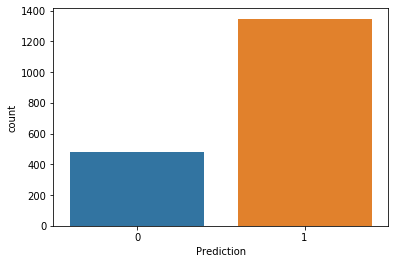

In [36]:
import seaborn as sns 
sns.countplot(label_tt.Prediction)